Benny Cohen

8/8/2020

DAV 6150 M13

### Intro

In this notebook we will be looking at a dataset about diamonds provided to us by the DAV 6150 course. We will try to classify the cut of the diamond. 

In order to do this we will examine the features of our dataset, prepare the data, then create different neural networks. 


### EDA 

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
username = 'cohenb51'
path = 'Katz_School/develop/DAV6150/Project3_Data.csv'
df = pd.read_csv(f'https://raw.githubusercontent.com/{username}/{path}')

In [7]:
df.shape

(53940, 10)

In [8]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

We see that we have 10 columns and 53940 rows. This is a very long, but not very wide dataset. 

The description of the dataset can be found at https://ggplot2.tidyverse.org/reference/diamonds.html

1. price - price in US dollars (326-18,823)

2. carat - weight of the diamond (0.2--5.01)

3. cut - quality of the cut (Fair, Good, Very Good, Premium, Ideal)

4. color -  diamond colour, from D (best) to J (worst)

5. clarity - a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

6. x - length in mm (0--10.74)

7. y width in mm (0--58.9)

8. z - depth in mm (0--31.8)

9. depth - total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

10. table - width of top of diamond relative to widest point (43--95)

A lot of these variables we would think would be correlated with each other. For example, we would think that the higher the price, the larger the diamond would be and the better the cut. When it comes to the feature cut in particular though, the variable we are trying to predict, some of the variables like color logically won't relate to the cut.

For a bit of domain knowledge, we can look at how diamond cuts are graded here. https://www.diamonds.pro/education/cuts/

The key sentence I think we should focus in on is this line

"Many elements are involved in Cut quality including its proportions, facets, finishing details and ability to reflect light. The better these characterstics are as a whole, the higher the quality of the diamond, and in return, the higher the price."

We see from this sentence how many of the features we have will effect the cut rating. We have several proportion features like x,y,z, and features for clarity and color which help define the diamonds ability to reflect light.

In [9]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

None of our features have nulls...

In [10]:
df.head(2)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


carat, depth, table,price,x,y,and z are all numeric. color, cut and clarity are categorical.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001ABB9E212E8>,
      dtype=object)

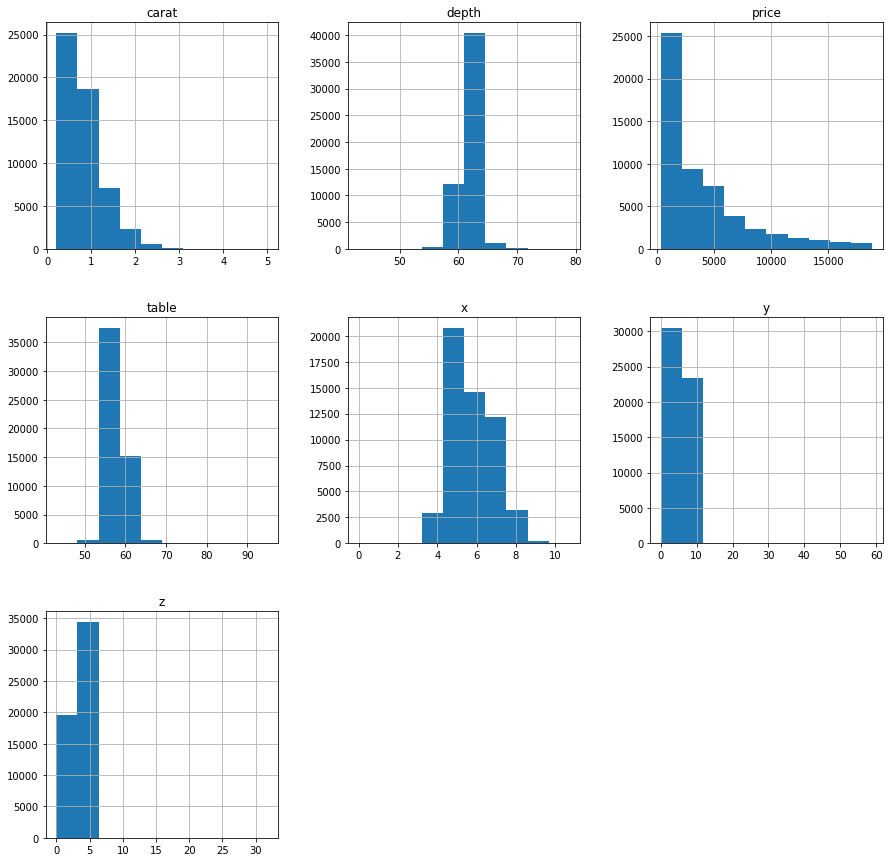

In [11]:
df.hist(figsize = (15,15))

Carat and price are left skewed. depth, table, and z seem to have very large peaks. 

It makes sense that Carat and price are let skewed. Price is naturally tied to carat as when people buy diamonds they are paying per carat. Most diamonds have low low weights and a few have high and sell for more. That's why both graphs are rightly skewed.

The large peaks for the dimensions indicates that there isn't that much variance but it seems slightly odd that there are outliers stretching the graph out very far. 

In [12]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Another note is that the z and y seem to have values at 0. 

In [13]:
(df.x == 0).sum()

8

In [14]:
(df.y == 0).sum()

7

In [15]:
(df.z == 0).sum()

20

In [16]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


There are 7 values with y of 0 and 20 values of z = 0. Let's see what these rows are.

In [17]:
df[df.y == 0]

,carat,cut,color,clarity,depth,table,price,x,y,z
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.0,0.0,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.0,0.0,0.0
24520,1.56,Ideal,G,VS2,62.2,54.0,12800,0.0,0.0,0.0
26243,1.20,Premium,D,VVS1,62.1,59.0,15686,0.0,0.0,0.0
27429,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.0,0.0
49556,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.0,0.0
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.0,0.0


In [18]:
df[df.z == 0]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [19]:
df[df.x == 0]

,carat,cut,color,clarity,depth,table,price,x,y,z
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.0,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.0,0.00,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.0,0.00,0.0
24520,1.56,Ideal,G,VS2,62.2,54.0,12800,0.0,0.00,0.0
26243,1.20,Premium,D,VVS1,62.1,59.0,15686,0.0,0.00,0.0
27429,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.00,0.0
49556,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.00,0.0
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.00,0.0


All the rows with 0 values for x and y also have 0 values for 0. This seems like a data collection problem. In theory if we were short on data we could impute these values but this is such a low proportion of our dataset we could drop them. It probably wouldn't make that much of a difference even if we included them.

In [20]:
(df.z > 7).sum()

2

There are 2 values with a depth > 7. 

In [21]:
(df.y > 15).sum()

2

Likewise 2 values have a very large y.

In [22]:
df[df.z>7]

,carat,cut,color,clarity,depth,table,price,x,y,z
24067,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.90,8.06
48410,0.51,Very Good,E,VS1,61.8,54.7,1970,5.12,5.15,31.80


In [23]:
df[df.y>15]

,carat,cut,color,clarity,depth,table,price,x,y,z
24067,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.9,8.06
49189,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.8,5.12


Nothing strikes out about these rows to me other than that there y/z seems to be off by more than a factor of 10. I don't think this will really effect our model if we include them but we might as well drop them since its only 3 records. 

Let's look at correlations.

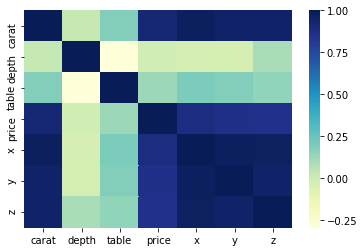

In [24]:
import seaborn as sns
corr = df.corr()

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap="YlGnBu")

There is a lot of correlation between our features. 

In particular, we see carat, the weight of the diamond, is highly correlated with the dimensions. Price seems to be most related to the size of the diamond.

In [25]:
corr['carat']

carat    1.000000
depth    0.028224
table    0.181618
price    0.921591
x        0.975094
y        0.951722
z        0.953387
Name: carat, dtype: float64

x,y,z, and price all have correlations of > 90 percent.

Let's look at our categorical variables.

In [26]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [27]:
df.cut.value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

This is our target variable. We see that most of our cuts are ideal...

In [28]:
21551/len(df)

0.3995365220615499

Indeed ~40 percent are ideal.

In [29]:
df.color.value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

G,H,E are the most common colors. This is actually an ordinal variable since D indicates best color and each color after that is worse. Most colors seem to be in the middle.

In [30]:
df.clarity.value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

This is also a ordered categorical variable. From the description above the order is: I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)

We see most values are in the middle.

We will graph these after our data prep step.

In [31]:
df.groupby('cut').mean()

,carat,depth,table,price,x,y,z
cut,,,,,,,
Fair,1.046137,64.041677,59.053789,4358.757764,6.246894,6.182652,3.982770
Good,0.849185,62.365879,58.694639,3928.864452,5.838785,5.850744,3.639507
Ideal,0.702837,61.709401,55.951668,3457.541970,5.507451,5.520080,3.401448
Premium,0.891955,61.264673,58.746095,4584.257704,5.973887,5.944879,3.647124
Very Good,0.806381,61.818275,57.956150,3981.759891,5.740696,5.770026,3.559801


When we group by cut, the most significant difference seems to be carat. The weight of cuts that are simply fair, are around 1 while ideal is around .7

Note that the order of the rows isn't in order (ideal is the 3rd one.)

In [32]:
ideal = df[df.cut == 'Ideal']

In [33]:
ideal.color.value_counts()/len(ideal)

G    0.226625
E    0.181105
F    0.177532
H    0.144541
D    0.131502
I    0.097118
J    0.041576
Name: color, dtype: float64

In [34]:
df.color.value_counts()/len(df)

G    0.209344
E    0.181628
F    0.176900
H    0.153949
D    0.125603
I    0.100519
J    0.052058
Name: color, dtype: float64

It seems like color isn't so predictive of the color as these values are all around the same. This also logically makes sense as color isn't really logically related to how well the person will cut a diamond.

In [35]:
df.clarity.value_counts()/len(df)

SI1     0.242214
VS2     0.227253
SI2     0.170449
VS1     0.151483
VVS2    0.093919
VVS1    0.067760
IF      0.033185
I1      0.013737
Name: clarity, dtype: float64

In [36]:
ideal.clarity.value_counts()/len(ideal)

VS2     0.235302
SI1     0.198691
VS1     0.166535
VVS2    0.120922
SI2     0.120551
VVS1    0.094984
IF      0.056239
I1      0.006775
Name: clarity, dtype: float64

refer: I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)

The percentage of high IF is 2 percent higher and VVS1 is around 3 percent higher. These are pretty big differences since the values had low percentages to start with.

In [37]:
df.cut.value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [38]:
_map =   {
    "Ideal" : 1,
    "Premium" : 2,
    "Very Good" : 3,
    "Good" : 4,
    "Fair" : 5,
}

In [39]:
import numpy as np
cuts = df['cut'].map(_map).astype(np.int)

In [40]:
numericalCols = ['carat','depth', 'table', 'price', 'x', 'y','z' ]

In order to calculate the correlation between these variables and our target, we can use f scores. https://dzone.com/articles/correlation-between-categorical-and-continuous-var-1

In [41]:
from scipy import stats

for col in numericalCols:
    F, p = stats.f_oneway(df[df.cut=='Ideal'][col],
                      df[df.cut=='Premium'][col],
                      df[df.cut=='Very Good'][col],
                        df[df.cut=='Good'][col],
                      df[df.cut=='Fair'][col])
    print(f'The f score for {col} is {F} with a p value of {p}' )

print(F)

The f score for carat is 495.69425927416324 with a p value of 0.0
The f score for depth is 1897.4085865319598 with a p value of 0.0
The f score for table is 6367.179433767924 with a p value of 0.0
The f score for price is 175.68871735080606 with a p value of 8.42830730759452e-150
The f score for x is 489.3942696199593 with a p value of 0.0
The f score for y is 395.7202028355892 with a p value of 0.0
The f score for z is 489.39820841970567 with a p value of 0.0
489.39820841970567


The higher the score, the more correltion there is. We see that all of these values have high correlations.

1. Table and depth are the most significant - this makes sense as the table represents the width of the diamond at its longest point and depth represents how deep the diamond is. As we saw at https://www.diamonds.pro/education/cuts/ the proportions of the diamond are very important
2. Price is the least important - We can see here for why https://beyond4cs.com/cut/effects-on-pricing/#:~:text=At%20the%20heart%20of%20it%2C%20the%20carat%20weight,diamond%20can%20drastically%20increase%20or%20decrease%20its%20value
Although it is true that the price increases as the cut is better, this is assuming that the cost of the carat is constant. Because in our dataset the carat variable is fluctuating we expect to see some correlation but it may not be as high as it could be.

### EDA Summary:
        Our target variable cut has around 40 percent ideal. The better cuts all have higher frequency. 
        Our target variable is correlated with most of our other features. 
        Many of our numerical variables are correlated with each other.

### Data Prep

We need to ordinal encode our clarity variable. Color we will drop as we saw from our eda isn't so insightful.

In [43]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [44]:
df.clarity.value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

Recall - I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

In [45]:
_map =   {
    "I1" : 1,
    "SI2" : 2,
    "SI1" : 3,
    "VS2" : 4,
    "VS1" : 5,
    "VVS2" :6,
    "VVS1" : 7,
    "IF" : 8,
}

In [46]:
df['clarity'] = df['clarity'].map(_map).astype(int)

Let's drop the outlier rows we mentioned earlier. This is a low proportion of our total size

In [47]:
df.drop([49189, 24067,48410], inplace = True)

In [48]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

We have a lot of features that are very correlated. This might make the model longer to train. I therefore am going to drop some of the correlated variables. 

I will also drop the color feature though since we saw in our eda that there is no significant difference with this column.

In [49]:
df = df.drop('color', axis = 1)

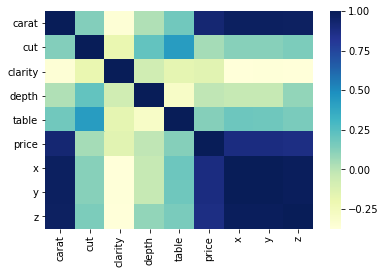

In [50]:
import seaborn as sns
corr = df.corr()

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap="YlGnBu")

Some of values look around 1 but let's get the actual values.

In [51]:
corr['x']

carat      0.975093
cut        0.125575
clarity   -0.371963
depth     -0.025213
table      0.195343
price      0.884425
x          1.000000
y          0.998339
z          0.986193
Name: x, dtype: float64

In [52]:
corr['y']

carat      0.974439
cut        0.125118
clarity   -0.366848
depth     -0.028355
table      0.189169
price      0.886225
x          0.998339
y          1.000000
z          0.985587
Name: y, dtype: float64

In [53]:
corr['z']

carat      0.968554
cut        0.151104
clarity   -0.373012
depth      0.096625
table      0.154297
price      0.874910
x          0.986193
y          0.985587
z          1.000000
Name: z, dtype: float64

In [54]:
corr['carat']

carat      1.000000
cut        0.134980
clarity   -0.352800
depth      0.028322
table      0.181618
price      0.921585
x          0.975093
y          0.974439
z          0.968554
Name: carat, dtype: float64

In [55]:
df.columns

Index(['carat', 'cut', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object')

We see that carat is explaining over 95 percent of the variance in x,y,z and z. This makes sense as the larger the dimensions, the more the diamond weighs. Therefore, we won't be losing that much by dropping these columns. Price also has a large correlation as generally the cost is by carat however I think we should keep it as we have so few columns and price does change as based on the cut as we saw in the article above.

In [56]:
df.drop(['x','y','z'], axis = 1, inplace = True)

Note that a side effect of this is that we don't need to deal with the rows with 0 dimensions, although as mentioned earlier these rows aren't the biggest deal.

Let's also scale the data.

In [57]:
df.columns

Index(['carat', 'cut', 'clarity', 'depth', 'table', 'price'], dtype='object')

In [63]:
from sklearn.preprocessing import StandardScaler
numericalCols = ['carat', 'depth', 'price', 'table']
scaler = StandardScaler()
scaler.fit(df[numericalCols])
scaled = pd.DataFrame(scaler.transform(df[numericalCols]))
scaled.columns = numericalCols
for col in numericalCols:
    df[col] = scaled[col]

### Prepped Data Review

Aside from the columns we dropped, we used an ordinal encoder to convert the color column.

In [64]:
df['clarity'].value_counts()

3    13065
4    12258
2     9193
5     8169
6     5066
7     3655
8     1790
1      741
Name: clarity, dtype: int64

Comparing these too the numbers we saw above in our eda we see that these numbers match.

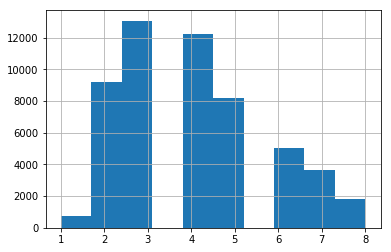

In [65]:
df['clarity'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001ABBF2E4668>,
      dtype=object)

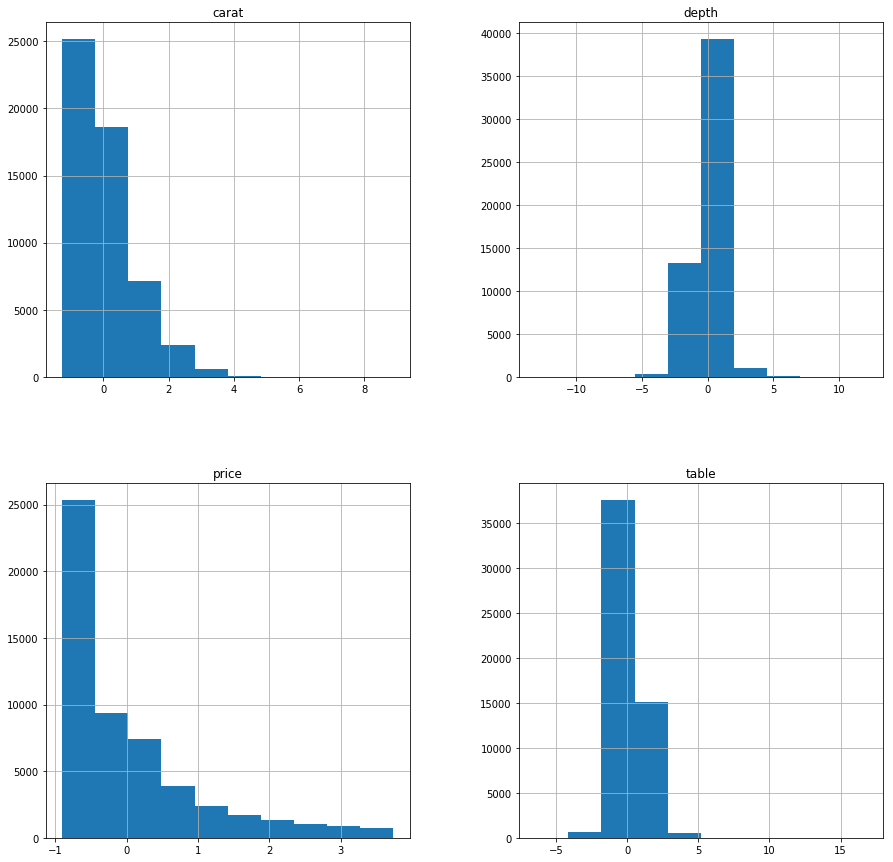

In [66]:
df[numericalCols].hist(figsize = (15,15))

We also see the effect of our standard scaler here. We have some negative values which logically don't make sense but the model would be able to handle.

### Model Building.

In this section, we will be constructing different feed-forward, back propagating neural network models. My computer is not that strong so we will start with a basic model and slowly scale upwards.

First let's split our data into train and test sets.

In [109]:
from sklearn.model_selection import train_test_split
y = df['cut']
x= df.drop(['cut'], axis = 1)

In [110]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [111]:
X_train.columns

Index(['carat', 'clarity', 'depth', 'table', 'price'], dtype='object')

In [112]:
X_train.tail()

,carat,clarity,depth,table,price
11284,0.531810,4,0.454102,0.690413,0.261267
44733,-0.480873,4,0.872922,0.242881,-0.580477
38159,-0.966116,7,0.314495,-0.652184,-0.731630
860,0.215347,3,0.733315,0.690413,-0.266139
15795,0.721688,3,-0.941966,0.242881,0.598416


In [113]:
y.value_counts() # we actually transformed this variable above when we did our eda to be numerical.

1    21549
2    13789
3    12080
4     4906
5     1610
Name: cut, dtype: int64

We need to encode remap these to integers.

Note we have 6 columns and our target variable has 5 values.

### Model 1

Intuitivly, I would think since we aren't using so many features we shouldn't need so many layers. Let's start with 1 dense layer with a relu activation function and a layer with a softmax function to generate the output. Let's use 36 as that is the number of features squared which sounds like a good starting point.

In [147]:
impor keras
model = keras.models.Sequential()
model.add(keras.layers.Dense(36, activation="relu"))
model.add(keras.layers.Dense(6, activation="softmax"))

In [148]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [149]:
X_train.isna().sum()

carat      0
clarity    0
depth      0
table      0
price      0
dtype: int64

In [143]:
history = model.fit(X_train.values, y_train.values, epochs = 3)

Epoch 1/3
43147/43147 [==============================] - 5s 114us/step - loss: 1.3002 - acc: 0.4635 0s - loss: 1.3083 -
Epoch 2/3
43147/43147 [==============================] - ETA: 0s - loss: 1.2507 - acc: 0.484 - 4s 82us/step - loss: 1.2506 - acc: 0.4843
Epoch 3/3
43147/43147 [==============================] - 3s 74us/step - loss: 1.2353 - acc: 0.4922: 1s - loss: 1.2403 - acc: 0. - ETA: 1s - loss


In [ ]:
import sklearn.metrics as metrics
scores = model.predict_classes(X_train)
print(metrics.classification_report(y_train,scores))

Remember from our mapping above...
1 is ideal
5 is the worst.


This simple model has an accuracy around .49. It is fairly quick to run. We can use this as a baseline and start adding more layers to this as we see this isn't complicated enough. First though, we see that if we increase the number of epochs we might be able to increase our score as it will minimize the loss function more.

In [144]:
def BuildModel(n_layers, nodes):
    model = keras.models.Sequential()
    for i in range(n_layers):
        model.add(keras.layers.Dense(nodes, activation="relu"))
    model.add(keras.layers.Dense(6, activation="softmax"))
    return model


In [158]:
model = BuildModel(5, 36) # 5 layer with 36 nodes. 36 since 36 is the number of features squared. 5 layers so we have 5 x as many layers as the previous. 
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

I will use 100 epochs as that is not too long but also not too short. We can see if our accuracy score is still going up at the end.

In [166]:
history = model.fit(X_train.values, y_train.values, epochs = 100)

Epoch 1/100
43147/43147 [==============================] - 4s 97us/step - loss: 1.0704 - acc: 0.5555
Epoch 2/100
43147/43147 [==============================] - 4s 96us/step - loss: 1.0701 - acc: 0.5549
Epoch 3/100
43147/43147 [==============================] - 4s 96us/step - loss: 1.0704 - acc: 0.5542
Epoch 4/100
43147/43147 [==============================] - 4s 96us/step - loss: 1.0696 - acc: 0.5552
Epoch 5/100
43147/43147 [==============================] - 4s 97us/step - loss: 1.0687 - acc: 0.5541
Epoch 6/100
43147/43147 [==============================] - 4s 96us/step - loss: 1.0680 - acc: 0.5563
Epoch 7/100
43147/43147 [==============================] - 4s 97us/step - loss: 1.0673 - acc: 0.5568
Epoch 8/100
43147/43147 [==============================] - 4s 96us/step - loss: 1.0676 - acc: 0.5557
Epoch 9/100
43147/43147 [==============================] - 4s 103us/step - loss: 1.0667 - acc: 0.5567 1s - loss
Epoch 10/100
43147/43147 [==============================] - 4s 97us/step - loss:

43147/43147 [==============================] - 4s 104us/step - loss: 1.0463 - acc: 0.5650
Epoch 75/100
43147/43147 [==============================] - ETA: 0s - loss: 1.0467 - acc: 0.563 - 5s 114us/step - loss: 1.0471 - acc: 0.5631
Epoch 76/100
43147/43147 [==============================] - 5s 111us/step - loss: 1.0466 - acc: 0.5659 3s - loss: 1.0 - ETA: 2s - loss - ETA: 1s - loss: 1.0477 - acc: 0.56 - ETA: 1s - loss: 1.0480 - acc: - ETA: 1s - loss:
Epoch 77/100
43147/43147 [==============================] - 4s 101us/step - loss: 1.0464 - acc: 0.5645
Epoch 78/100
43147/43147 [==============================] - 4s 98us/step - loss: 1.0467 - acc: 0.5640
Epoch 79/100
43147/43147 [==============================] - 4s 101us/step - loss: 1.0451 - acc: 0.5640
Epoch 80/100
43147/43147 [==============================] - 5s 106us/step - loss: 1.0457 - acc: 0.5649
Epoch 81/100
43147/43147 [==============================] - 4s 98us/step - loss: 1.0456 - acc: 0.5669
Epoch 82/100
43147/43147 [========

This model has better accuracy score at around .55. We see that we can actually increase the number of epochs isn't dramatically improving our scores.

In [167]:
scores = model.predict_classes(X_train.values)
print(metrics.classification_report(y_train,scores))

              precision    recall  f1-score   support

           1       0.61      0.80      0.69     17206
           2       0.49      0.59      0.54     11049
           3       0.49      0.23      0.31      9722
           4       0.68      0.30      0.41      3912
           5       0.86      0.50      0.64      1258

    accuracy                           0.57     43147
   macro avg       0.63      0.49      0.52     43147
weighted avg       0.57      0.57      0.54     43147



In [163]:
Our scores are slightly better with this model. The main reason why may simply be increasing the number of epochs.

array([5, 2, 1, ..., 1, 2, 2], dtype=int64)

Let's now try doubling the number of layers and see how that impacts the model.

In [168]:
model = BuildModel(10, 36) # 5 layer with 36 nodes. 36 since 36 is the number of features squared. 5 layers so we have 5 x as many layers as the previous. 
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

I will use 100 epochs again so we could directly compare just how increasing the layers effects the model and also because past 100 the accuracy doesn't improve so much.


In [171]:
history = model.fit(X_train.values, y_train.values, epochs = 100)

Epoch 1/100
43147/43147 [==============================] - 5s 110us/step - loss: 1.1100 - acc: 0.5386
Epoch 2/100
43147/43147 [==============================] - 5s 110us/step - loss: 1.1073 - acc: 0.5397
Epoch 3/100
43147/43147 [==============================] - 5s 110us/step - loss: 1.1041 - acc: 0.5420
Epoch 4/100
43147/43147 [==============================] - 5s 109us/step - loss: 1.1013 - acc: 0.5437
Epoch 5/100
43147/43147 [==============================] - 5s 111us/step - loss: 1.0993 - acc: 0.5446
Epoch 6/100
43147/43147 [==============================] - 5s 110us/step - loss: 1.0966 - acc: 0.5435
Epoch 7/100
43147/43147 [==============================] - 5s 122us/step - loss: 1.0951 - acc: 0.5456
Epoch 8/100
43147/43147 [==============================] - 5s 111us/step - loss: 1.0935 - acc: 0.5453
Epoch 9/100
43147/43147 [==============================] - 5s 110us/step - loss: 1.0903 - acc: 0.5481
Epoch 10/100
43147/43147 [==============================] - 5s 111us/step - loss: 

43147/43147 [==============================] - 5s 107us/step - loss: 1.0512 - acc: 0.5649
Epoch 80/100
43147/43147 [==============================] - 5s 107us/step - loss: 1.0496 - acc: 0.5646
Epoch 81/100
43147/43147 [==============================] - 5s 109us/step - loss: 1.0488 - acc: 0.5659
Epoch 82/100
43147/43147 [==============================] - 5s 108us/step - loss: 1.0488 - acc: 0.5667
Epoch 83/100
43147/43147 [==============================] - 5s 107us/step - loss: 1.0501 - acc: 0.5641
Epoch 84/100
43147/43147 [==============================] - 5s 107us/step - loss: 1.0482 - acc: 0.5643 0s - loss: 1.0466 - 
Epoch 85/100
43147/43147 [==============================] - 5s 106us/step - loss: 1.0475 - acc: 0.5669
Epoch 86/100
43147/43147 [==============================] - 5s 107us/step - loss: 1.0482 - acc: 0.5652
Epoch 87/100
43147/43147 [==============================] - 5s 107us/step - loss: 1.0474 - acc: 0.5656
Epoch 88/100
43147/43147 [==============================] - 5s 10

In [172]:
scores = model.predict_classes(X_train.values)
print(metrics.classification_report(y_train,scores))

              precision    recall  f1-score   support

           1       0.61      0.83      0.70     17206
           2       0.51      0.56      0.53     11049
           3       0.47      0.27      0.34      9722
           4       0.79      0.27      0.40      3912
           5       0.80      0.53      0.64      1258

    accuracy                           0.57     43147
   macro avg       0.64      0.49      0.52     43147
weighted avg       0.57      0.57      0.55     43147



The scores are minutely higher than the last model but it also is a lot slower. We should see if taking away some nodes helps.

In [173]:
model = BuildModel(5, 18) #half as many nodes in each hidden layer
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [174]:
history = model.fit(X_train.values, y_train.values, epochs = 100)

Epoch 1/100
43147/43147 [==============================] - 7s 151us/step - loss: 1.3193 - acc: 0.4496
Epoch 2/100
43147/43147 [==============================] - 4s 98us/step - loss: 1.2472 - acc: 0.4838
Epoch 3/100
43147/43147 [==============================] - 4s 98us/step - loss: 1.2150 - acc: 0.5028
Epoch 4/100
43147/43147 [==============================] - 4s 98us/step - loss: 1.1942 - acc: 0.5133
Epoch 5/100
43147/43147 [==============================] - 4s 101us/step - loss: 1.1782 - acc: 0.5194 0s - loss: 1.1785 - acc:
Epoch 6/100
43147/43147 [==============================] - 5s 105us/step - loss: 1.1659 - acc: 0.5226 1s - loss:
Epoch 7/100
43147/43147 [==============================] - 4s 96us/step - loss: 1.1558 - acc: 0.5268
Epoch 8/100
43147/43147 [==============================] - 4s 97us/step - loss: 1.1478 - acc: 0.5265: 0s - loss: 1.1483 - 
Epoch 9/100
43147/43147 [==============================] - 4s 97us/step - loss: 1.1409 - acc: 0.5274: 0s - loss: 1.1414 - acc
Epoch

43147/43147 [==============================] - 4s 96us/step - loss: 1.0797 - acc: 0.5499: 1s - loss: 1.0713 - acc: 0.553 - ETA: 1s - 
Epoch 78/100
43147/43147 [==============================] - 5s 106us/step - loss: 1.0795 - acc: 0.5494
Epoch 79/100
43147/43147 [==============================] - 4s 95us/step - loss: 1.0790 - acc: 0.5513
Epoch 80/100
43147/43147 [==============================] - 5s 113us/step - loss: 1.0795 - acc: 0.5514 0s - loss: 1.0781 - 
Epoch 81/100
43147/43147 [==============================] - 4s 96us/step - loss: 1.0779 - acc: 0.5512: 0s - loss: 1.0770 - acc: 
Epoch 82/100
43147/43147 [==============================] - 4s 97us/step - loss: 1.0786 - acc: 0.5510
Epoch 83/100
43147/43147 [==============================] - 4s 94us/step - loss: 1.0781 - acc: 0.5519: 
Epoch 84/100
43147/43147 [==============================] - 5s 112us/step - loss: 1.0784 - acc: 0.5501 0s - loss: 1.0
Epoch 85/100
43147/43147 [==============================] - 4s 94us/step - loss: 1.0

In [175]:
scores = model.predict_classes(X_train.values)
print(metrics.classification_report(y_train,scores))

              precision    recall  f1-score   support

           1       0.56      0.88      0.69     17206
           2       0.53      0.49      0.51     11049
           3       0.47      0.19      0.27      9722
           4       0.74      0.27      0.39      3912
           5       0.85      0.48      0.61      1258

    accuracy                           0.56     43147
   macro avg       0.63      0.46      0.49     43147
weighted avg       0.56      0.56      0.52     43147



Our f1 scores are a few percentage points lower but I think this is the best version for number of nodes and layers because thi is faster than the previous and the difference is small.

Aside from layers, there are also other parameters we should try to optimize. Ideally, we would have a higher learning rate so that we could train the model faster. Let's try to find the best reasonble values for these.

Grid search will be too slow as it takes around 5 minutes to do 100 epochs on my computer so we will construct a few with different values.Let's start with e-3 and go up and down by factors of 10 as we would with an encompassing grid search. 

In [176]:
model = BuildModel(5, 18) #half as many nodes in each hidden layer
model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(lr=1e-3), metrics=["accuracy"])

In [177]:
history = model.fit(X_train.values, y_train.values, epochs = 50) 

Epoch 1/50
43147/43147 [==============================] - 7s 165us/step - loss: 1.4912 - acc: 0.3992 0s - loss: 1.4985 - acc
Epoch 2/50
43147/43147 [==============================] - 4s 98us/step - loss: 1.3684 - acc: 0.4131
Epoch 3/50
43147/43147 [==============================] - 4s 82us/step - loss: 1.3324 - acc: 0.4315
Epoch 4/50
43147/43147 [==============================] - 4s 92us/step - loss: 1.3152 - acc: 0.4439: 0s - loss: 1.3150 - ac
Epoch 5/50
43147/43147 [==============================] - 4s 98us/step - loss: 1.3043 - acc: 0.4500
Epoch 6/50
43147/43147 [==============================] - 4s 99us/step - loss: 1.2959 - acc: 0.4563
Epoch 7/50
43147/43147 [==============================] - 4s 98us/step - loss: 1.2891 - acc: 0.4607
Epoch 8/50
43147/43147 [==============================] - 4s 98us/step - loss: 1.2834 - acc: 0.4627
Epoch 9/50
43147/43147 [==============================] - 4s 102us/step - loss: 1.2786 - acc: 0.4644
Epoch 10/50
43147/43147 [=========================

In [178]:
scores = model.predict_classes(X_train.values)
print(metrics.classification_report(y_train,scores))

              precision    recall  f1-score   support

           1       0.59      0.78      0.67     17206
           2       0.47      0.53      0.50     11049
           3       0.38      0.19      0.25      9722
           4       0.42      0.24      0.30      3912
           5       0.60      0.38      0.47      1258

    accuracy                           0.52     43147
   macro avg       0.49      0.42      0.44     43147
weighted avg       0.50      0.52      0.49     43147



This value seems to have lowered our accuracy. Let's try a lower learning rate.

In [179]:
model = BuildModel(5, 18) #half as many nodes in each hidden layer
model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(lr=1e-4), metrics=["accuracy"])

In [180]:
history = model.fit(X_train.values, y_train.values, epochs = 50) 

Epoch 1/50
43147/43147 [==============================] - 7s 152us/step - loss: 1.8323 - acc: 0.0752
Epoch 2/50
43147/43147 [==============================] - 4s 99us/step - loss: 1.7201 - acc: 0.3975
Epoch 3/50
43147/43147 [==============================] - 4s 99us/step - loss: 1.6526 - acc: 0.3988
Epoch 4/50
43147/43147 [==============================] - 4s 99us/step - loss: 1.6040 - acc: 0.3988
Epoch 5/50
43147/43147 [==============================] - 4s 101us/step - loss: 1.5659 - acc: 0.3988
Epoch 6/50
43147/43147 [==============================] - 4s 102us/step - loss: 1.5355 - acc: 0.3988
Epoch 7/50
43147/43147 [==============================] - 4s 101us/step - loss: 1.5102 - acc: 0.3988
Epoch 8/50
43147/43147 [==============================] - 4s 100us/step - loss: 1.4885 - acc: 0.3988
Epoch 9/50
43147/43147 [==============================] - 5s 106us/step - loss: 1.4695 - acc: 0.3988 0s - loss: 1
Epoch 10/50
43147/43147 [==============================] - 4s 100us/step - loss: 

It makes sense that our accuracy score is lower with this as we need to raise the learning rate to get a more optimum convergence rate. Let's raise it to e-2

In [ ]:
model = BuildModel(5, 18) #half as many nodes in each hidden layer
model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(lr=1e-2), metrics=["accuracy"])


In [182]:
history = model.fit(X_train.values, y_train.values, epochs = 50) 

Epoch 1/50
43147/43147 [==============================] - 7s 171us/step - loss: 1.3481 - acc: 0.4110 2s -
Epoch 2/50
43147/43147 [==============================] - 4s 101us/step - loss: 1.2668 - acc: 0.4541
Epoch 3/50
43147/43147 [==============================] - 4s 97us/step - loss: 1.2354 - acc: 0.4754
Epoch 4/50
43147/43147 [==============================] - 4s 101us/step - loss: 1.2138 - acc: 0.4932
Epoch 5/50
43147/43147 [==============================] - 4s 101us/step - loss: 1.2005 - acc: 0.5012
Epoch 6/50
43147/43147 [==============================] - 4s 101us/step - loss: 1.1888 - acc: 0.5079 1s
Epoch 7/50
43147/43147 [==============================] - 5s 104us/step - loss: 1.1798 - acc: 0.5132
Epoch 8/50
43147/43147 [==============================] - 5s 110us/step - loss: 1.1701 - acc: 0.5165
Epoch 9/50
43147/43147 [==============================] - 5s 113us/step - loss: 1.1621 - acc: 0.5162
Epoch 10/50
43147/43147 [==============================] - 5s 119us/step - loss: 1.1

This value seems to be better than the default. This model has the same accuracy as the model with the default parameters except it reached this amount in half the number of epochs. 

Model Selection Criteria

The best model we found had an accuracy around 57 percent. We were able to find a model that performs much faster wiht 55 percent. I think this model should be used because it is less complex. Also we found that we could change the default learning rate to speed up the learning.

Let's apply cross validation to see how this model does on new data.

In [240]:
from sklearn.model_selection import StratifiedKFold


def create_model():
    model = build_model(5,18)
    model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(lr=1e-2), metrics=["accuracy"])
    return model

def train_and_evaluate_model(model, train_x, train_y, test_x, test_y ):
    print("building")
    model.fit(train_x.values, train_y.values, epochs = 20, verbose = 0) # disable printing out a million lines
    scores = model.predict_classes(train_x)
    print(f'The accuracy score on the training data is {metrics.accuracy_score(scores, train_y)}')
    scores = model.predict_classes(test_x)
    print(f'The accuracy score on the test data is {metrics.accuracy_score(scores, test_y)}')
        

I'm going to run this with less epochs because my computer freezes up when I do more.

In [241]:
X_train_c = X_train.copy().reset_index()
X_train_c.drop('index', axis = 1, inplace = True)
y_train_c = y_train.copy().reset_index()
y_train_c.drop('index', axis = 1, inplace = True)


n_folds = 5
skf = StratifiedKFold(n_splits=5, shuffle=True)

for i, (train, test) in enumerate(skf.split(X_train,y_train)):
            print ("Running Fold", i+1, "/", n_folds)
            model = None # Clearing the NN.
            model = create_model()
            train_and_evaluate_model(model, X_train_c.iloc[train], y_train_c.iloc[train], X_train_c.iloc[test], y_train_c.iloc[test])

Running Fold 1 / 5
building
The accuracy score on the training data is 0.5315931280238723
The accuracy score on the test data is 0.5274623406720742
Running Fold 2 / 5
building
The accuracy score on the training data is 0.5318828403395428
The accuracy score on the test data is 0.5358053302433372
Running Fold 3 / 5
building
The accuracy score on the training data is 0.5340981516889739
The accuracy score on the test data is 0.5272916908100591
Running Fold 4 / 5
building
The accuracy score on the training data is 0.532852424821832
The accuracy score on the test data is 0.5336655464132576
Running Fold 5 / 5
building
The accuracy score on the training data is 0.5299553855959209
The accuracy score on the test data is 0.5274075790937536


Our cross validation shows us we aren't overfitting the data as our scores are around the same. 

Let's use this model on our test set. I think all of our models are doing similar but this has the best hyper parameters as 1. it is not overly complex and 2. the learning rate is the highest without negativly impacting the model.

In [242]:
model = create_model()

In [244]:
model.fit(X_train.values,y_train.values, epochs = 100, verbose = 1) # 100 we saw is high enough that it stops improving so much after.

Epoch 1/100
43147/43147 [==============================] - 4s 103us/step - loss: 1.0704 - acc: 0.5547
Epoch 2/100
43147/43147 [==============================] - 6s 130us/step - loss: 1.0699 - acc: 0.5550
Epoch 3/100
43147/43147 [==============================] - 5s 113us/step - loss: 1.0690 - acc: 0.5557
Epoch 4/100
43147/43147 [==============================] - 5s 112us/step - loss: 1.0689 - acc: 0.5553
Epoch 5/100
43147/43147 [==============================] - 4s 104us/step - loss: 1.0679 - acc: 0.5559
Epoch 6/100
43147/43147 [==============================] - 5s 126us/step - loss: 1.0682 - acc: 0.5555 0s - loss: 1.0696 - acc: 
Epoch 7/100
43147/43147 [==============================] - 6s 135us/step - loss: 1.0676 - acc: 0.5568
Epoch 8/100
43147/43147 [==============================] - 6s 145us/step - loss: 1.0676 - acc: 0.5567
Epoch 9/100
43147/43147 [==============================] - 5s 110us/step - loss: 1.0673 - acc: 0.5561
Epoch 10/100
43147/43147 [==============================

43147/43147 [==============================] - 5s 109us/step - loss: 1.0505 - acc: 0.5638
Epoch 80/100
43147/43147 [==============================] - 5s 112us/step - loss: 1.0496 - acc: 0.5624
Epoch 81/100
43147/43147 [==============================] - 5s 115us/step - loss: 1.0502 - acc: 0.5621
Epoch 82/100
43147/43147 [==============================] - 5s 122us/step - loss: 1.0491 - acc: 0.5626
Epoch 83/100
43147/43147 [==============================] - 6s 132us/step - loss: 1.0493 - acc: 0.5628
Epoch 84/100
43147/43147 [==============================] - 5s 118us/step - loss: 1.0493 - acc: 0.5628
Epoch 85/100
43147/43147 [==============================] - 5s 112us/step - loss: 1.0483 - acc: 0.5632
Epoch 86/100
43147/43147 [==============================] - 5s 110us/step - loss: 1.0483 - acc: 0.5653
Epoch 87/100
43147/43147 [==============================] - 5s 109us/step - loss: 1.0489 - acc: 0.5640
Epoch 88/100
43147/43147 [==============================] - 5s 111us/step - loss: 1.04

In [247]:
scores = model.predict_classes(X_test.values)
print(f'The accuracy score on the test data is {metrics.accuracy_score(scores, y_test)}')
print(metrics.classification_report(y_test,scores))

The accuracy score on the test data is 0.547232780198387
              precision    recall  f1-score   support

           1       0.59      0.82      0.68      4343
           2       0.54      0.45      0.49      2740
           3       0.37      0.26      0.31      2358
           4       0.55      0.33      0.41       994
           5       0.78      0.49      0.60       352

    accuracy                           0.55     10787
   macro avg       0.57      0.47      0.50     10787
weighted avg       0.53      0.55      0.53     10787



In [250]:
pd.Series(scores).value_counts()

1    6059
2    2259
3    1656
4     593
5     220
dtype: int64

In [251]:
y_test.value_counts()

1    4343
2    2740
3    2358
4     994
5     352
Name: cut, dtype: int64

Overall, our model is predicting too many ones but it is still predicting values in other categories. Each category has a precision above .5 except for category 3 which has a precision of .37 meaning it isn't able to predict it so well. This makes sense though as predicting the exact value of a class in the middle could be harder. We see that our model is correct most of the time it predicts a category 5 with .78. Remember 5 is the worst variable.

Overall, I don't think this model should be used. We saw in the assignment last week models like XGBoost and Random Forest outperform this model and is a bit simpler and less of a black box.

Conclusion

1. We saw from our EDA that many of our features were correlated, although the correlations were weaker with the cut variable.
2. Neural Nets did not suffer as much from overfitting as the random forest from last week yet overall performed a bit worse. 
3. We need around 100 epochs to achieve the greatest performance. The other parameters didn't seem to effect the model too much. If we had more compute power we could try more than 100 as we saw the performance was still increasing after 100.